# 04 — SVM Model

This notebook implements a **Support Vector Machine (LinearSVC)** model for drug usage classification.

**Goal**: Train, evaluate, and export an SVM model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os

plt.style.use('../style.mplstyle')

In [2]:
%load_ext watermark
%watermark -v -n -m -p numpy,pandas,sklearn,matplotlib,seaborn,joblib

Python implementation: CPython
Python version       : 3.12.12
IPython version      : 9.10.0

numpy     : 1.26.4
pandas    : 3.0.0
sklearn   : 1.8.0
matplotlib: 3.10.8
seaborn   : 0.13.2
joblib    : 1.5.3

Compiler    : Clang 17.0.0 (clang-1700.6.3.2)
OS          : Darwin
Release     : 25.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



## 1. Load Data

In [3]:
train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')
test_df = pd.read_csv('../data/processed/test.csv')

# Handle missing values
train_df['text_clean'] = train_df['text_clean'].fillna('')
val_df['text_clean'] = val_df['text_clean'].fillna('')
test_df['text_clean'] = test_df['text_clean'].fillna('')

print(f"Train: {train_df.shape}")

Train: (2100, 3)


## 2. Feature Extaction (TF-IDF)
Using `ngram_range=(1, 2)` and `max_features=5000`.

In [4]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_df['text_clean'])
X_val = vectorizer.transform(val_df['text_clean'])
X_test = vectorizer.transform(test_df['text_clean'])

y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

## 3. Training (LinearSVC)

In [5]:
clf = LinearSVC(class_weight='balanced', random_state=42, dual='auto')
clf.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'squared_hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseud

## 4. Evaluation

In [6]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
acc = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {acc:.4f}")

              precision    recall  f1-score   support

    NEGATIVE       0.80      0.84      0.82       225
    POSITIVE       0.83      0.79      0.81       225

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.82       450
weighted avg       0.82      0.82      0.82       450

SVM Accuracy: 0.8156


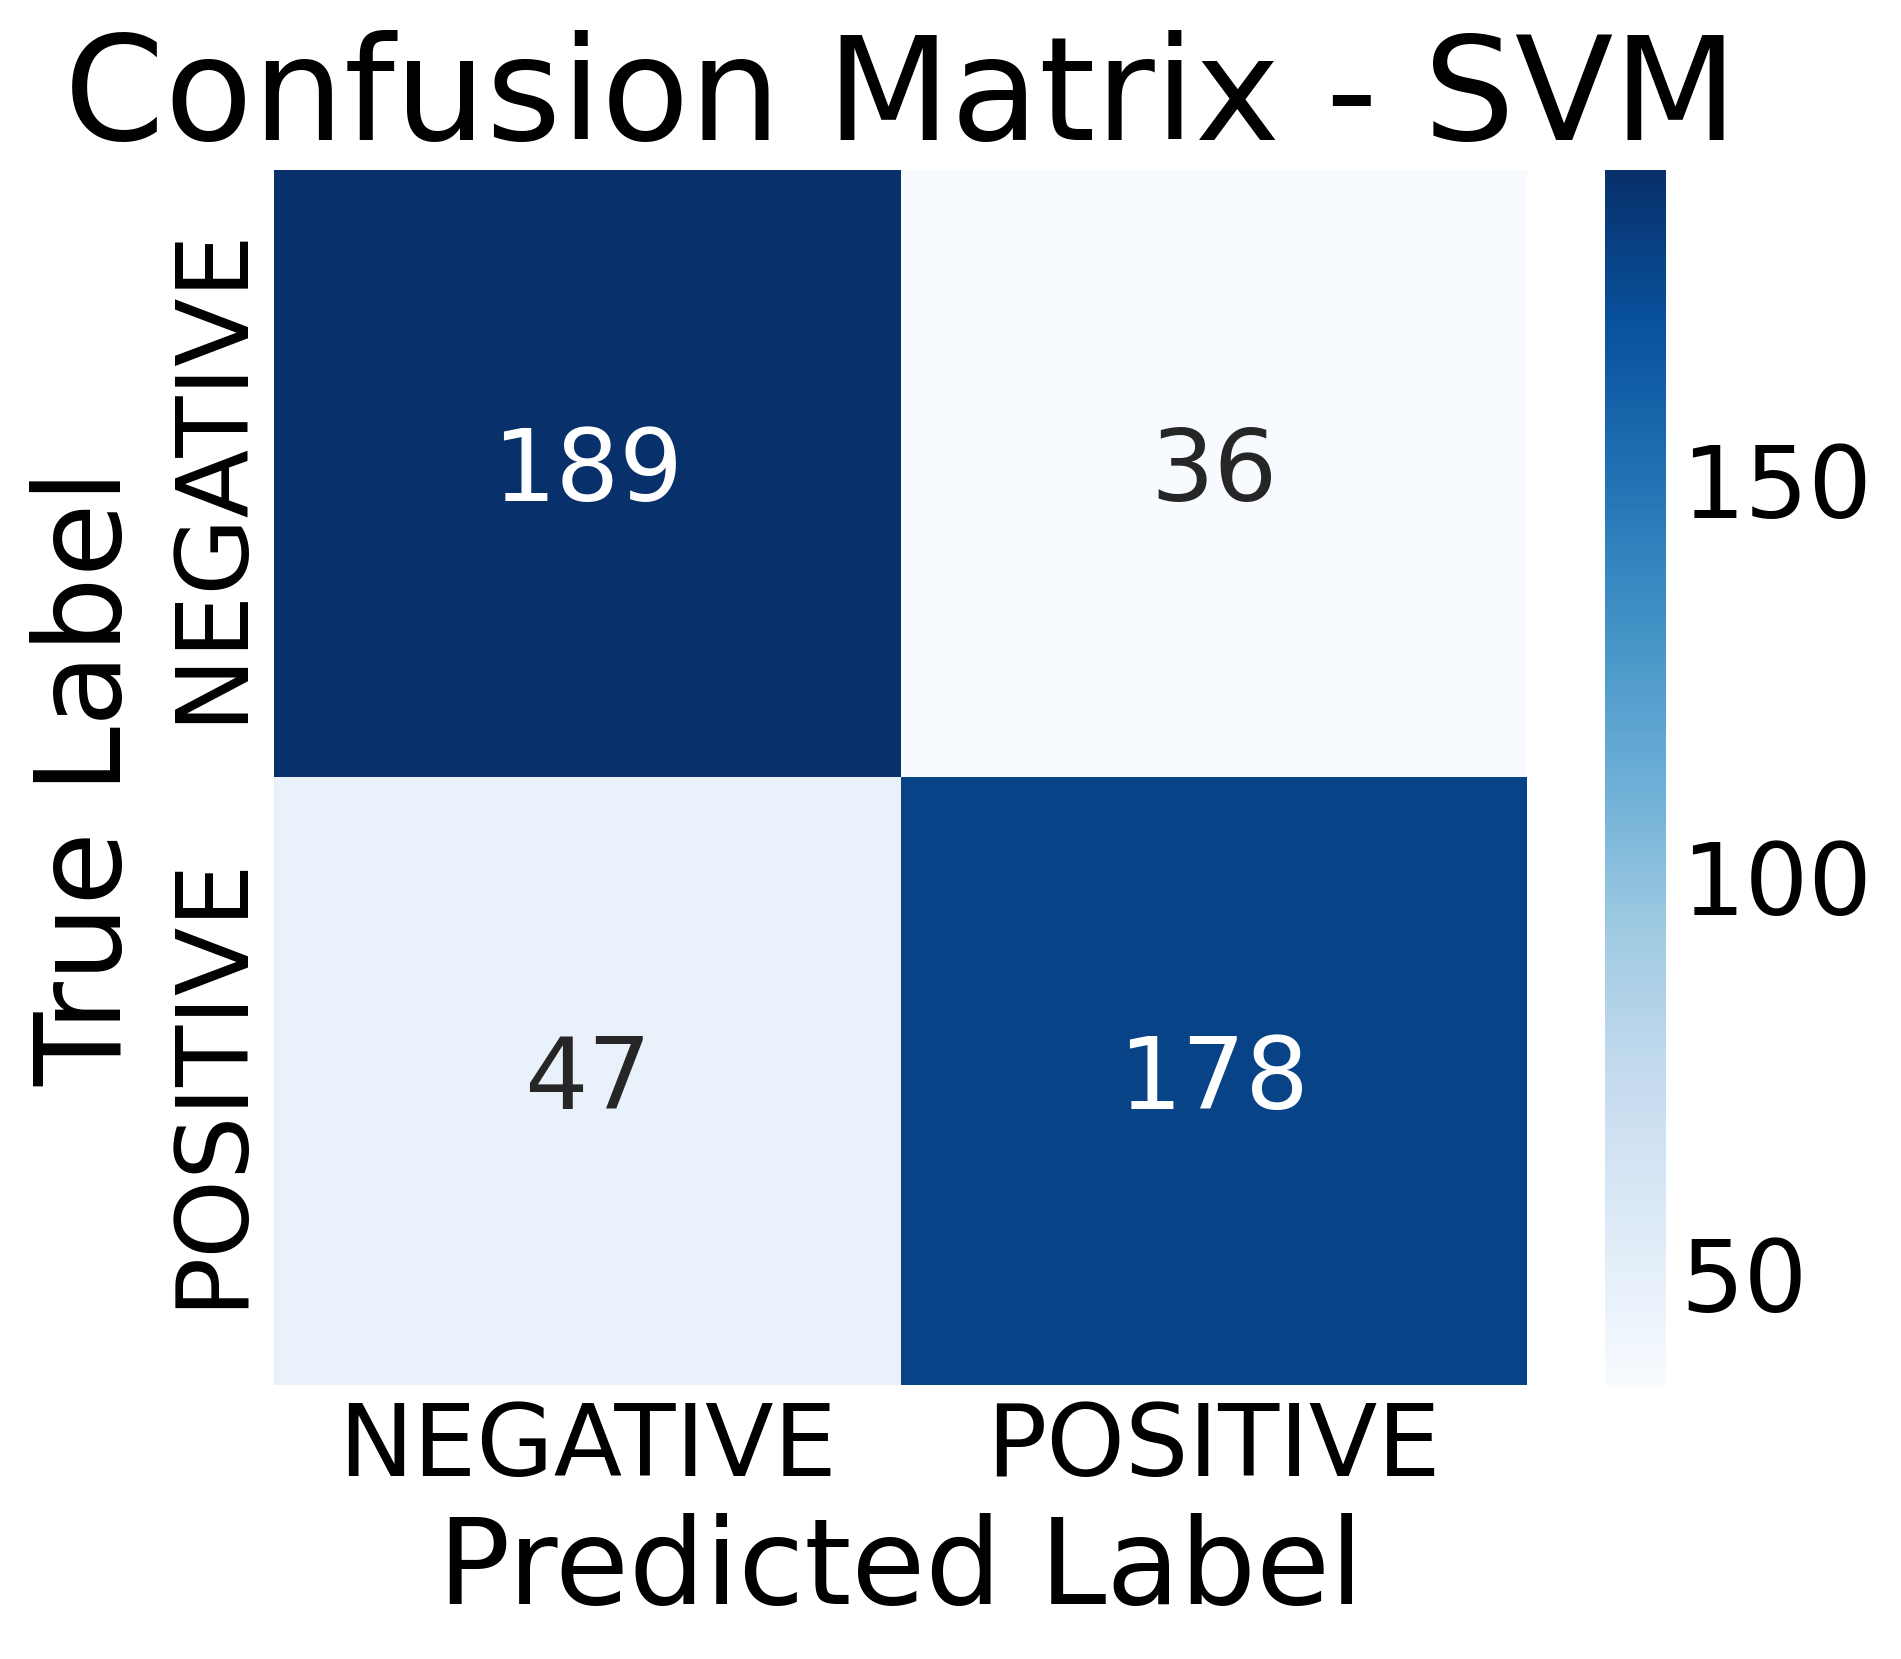

In [7]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - SVM')
plt.show()

## 5. Model Export

In [8]:
os.makedirs('../models/svm', exist_ok=True)\n
joblib.dump(clf, '../models/svm/model.joblib')
joblib.dump(vectorizer, '../models/svm/vectorizer.joblib')

print("SVM Model exported to ../models/svm_model.joblib")

SVM Model exported to ../models/svm_model.joblib
